### Regression with scikit-learn's diabetes dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Import scikit-learn's example diabetes dataset**

In [3]:
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()

**Print a description of the dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

**Get the feature and target arrays**

In [5]:
x = diabetes.data
y = diabetes.target

**Print the array dimensions of x and y**

In [6]:
x.shape, y.shape

((442, 10), (442,))

**scatter plots to look at the relationship between y and the features in x**

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

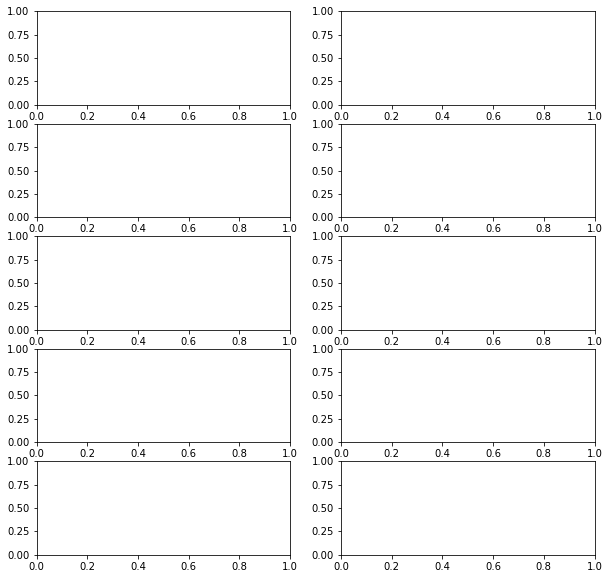

In [28]:
##this doesn't work because arrays?

fig,ax = plt.subplots(5,2,figsize=(10,10))

ax[0].plt.scatter(x[:,0],y)
ax[1].plt.scatter(x[:,1],y)
ax[2].plt.scatter(x[:,2],y)
ax[3].plt.scatter(x[:,3],y)
ax[4].plt.scatter(x[:,4],y)
ax[5].plt.scatter(x[:,5],y)
ax[6].plt.scatter(x[:,6],y)
ax[7].plt.scatter(x[:,7],y)
ax[8].plt.scatter(x[:,8],y)
ax[9].plt.scatter(x[:,9],y)

plt.show()

In [ ]:
plt.scatter(x[:,0],
            y)
plt.show()

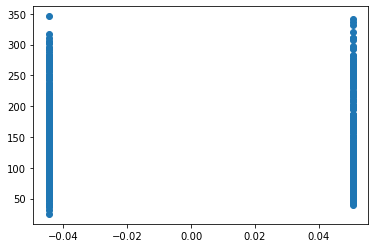

In [28]:
plt.scatter(x[:,1],
            y)
plt.show()

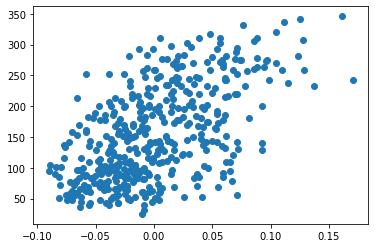

In [29]:
plt.scatter(x[:,2],
            y)
plt.show()

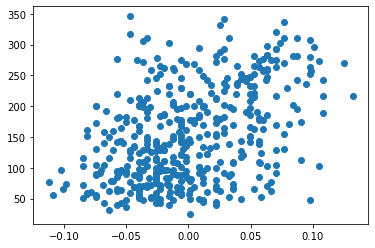

In [30]:
plt.scatter(x[:,3],
            y)
plt.show()

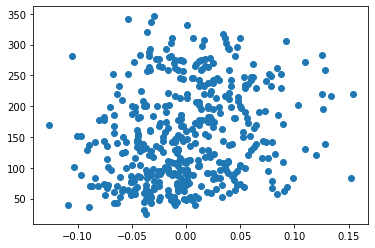

In [31]:
plt.scatter(x[:,4],
            y)
plt.show()

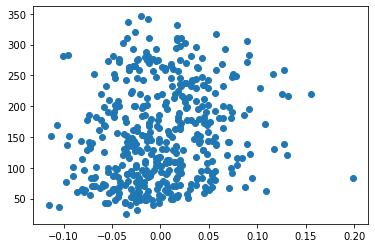

In [32]:
plt.scatter(x[:,5],
            y)
plt.show()

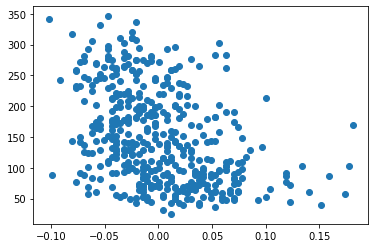

In [33]:
plt.scatter(x[:,6],
            y)
plt.show()

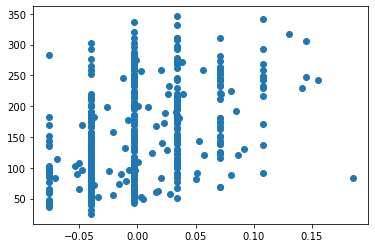

In [34]:
plt.scatter(x[:,7],
            y)
plt.show()

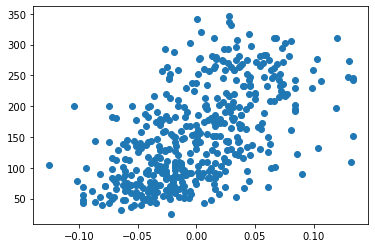

In [35]:
plt.scatter(x[:,8],
            y)
plt.show()

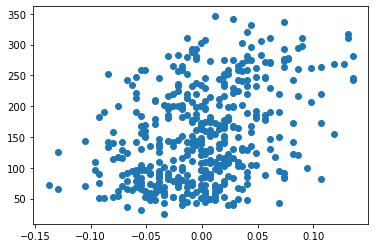

In [36]:
plt.scatter(x[:,9],
            y)
plt.show()

**loop that prints the 10 correlation coefficients between y and the 10 features in x**

In [17]:
for i in range(0,10):
    print('feature',i, np.corrcoef(x[:,i], y),'\n')

feature 0 [[1.         0.18788875]
 [0.18788875 1.        ]] 

feature 1 [[1.       0.043062]
 [0.043062 1.      ]] 

feature 2 [[1.         0.58645013]
 [0.58645013 1.        ]] 

feature 3 [[1.         0.44148385]
 [0.44148385 1.        ]] 

feature 4 [[1.         0.21202248]
 [0.21202248 1.        ]] 

feature 5 [[1.         0.17405359]
 [0.17405359 1.        ]] 

feature 6 [[ 1.         -0.39478925]
 [-0.39478925  1.        ]] 

feature 7 [[1.         0.43045288]
 [0.43045288 1.        ]] 

feature 8 [[1.         0.56588343]
 [0.56588343 1.        ]] 

feature 9 [[1.         0.38248348]
 [0.38248348 1.        ]] 



**linear regression using the feature in x that has the highest correlation coefficient with y**

In [8]:
import sklearn.linear_model

In [9]:
# feature 2 (BMI) has the highest correlation coefficient with y (disease progression one year after baseline) = 0.586

* Split your data into a training set and a test set
* Train the model
* Print the coefficients of the model
* Plot the linear model on top of a scatter plot for your training and test data
* Print the mean squared error and R-squared values for your model applied to the test data**

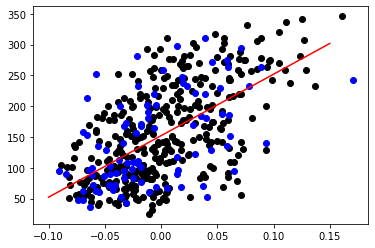

Intercept = 152.00
Model coefficients = 998.58
Mean squared error: 4061.83
Coefficient of determination R^2: 0.23


In [26]:
#define regression model
model1 = sklearn.linear_model.LinearRegression()

#create 80/20 training/testing data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x[:,2], y, test_size=0.2, random_state=42)

#transform 1D arrays into 2D arrays
x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

#build training model
model1.fit(x_train_transformed,
          y_train)

#scatter of training and test data
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

#plot linear model

#values for scale of x
x_model_vals = np.linspace(-0.1,0.15,442).reshape(-1,1)
#values for y based on model prediction
y_model1_vals = model1.predict(x_model_vals)

plt.plot(x_model_vals,y_model1_vals,'red')

plt.show()

#use built model to make prediction on test data
y_pred1 = model1.predict(x_test_transformed)

#print the model
print('Intercept = %.2f' % model1.intercept_)
print('Model coefficients = %.2f' % model1.coef_)

#print model performance (y_test = actual value, y_pred = predicted value)
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y_test, y_pred1))
print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y_test, y_pred1))

**linear regression using all 10 features at once when doing your model fit**

In [15]:
#define model
model2 = sklearn.linear_model.LinearRegression()

#create 80/20 train/test set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

#build the model
model2.fit(x_train,
          y_train)

#use built model to make prediction on test data
y_pred2 = model2.predict(x_test)

#print the model
print('Intercept = %.2f' % model2.intercept_)
print('Model coefficients:', model2.coef_)

#print model performance
print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y_test, y_pred2))
print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y_test, y_pred2))


Intercept = 151.35
Model coefficients: [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Mean squared error: 2900.17
Coefficient of determination R^2: 0.45


Using all of the features in the model, the MSE is about 30% lower (still quite high) than the model with just one feature. The R-squared value has also improved, by about double.

**just for fun looking at how test data corresponds to prediction**

In [16]:
import seaborn as sns

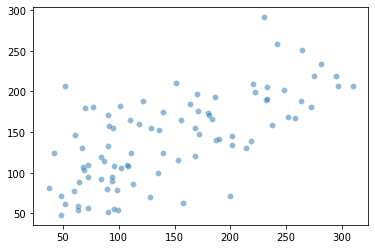

In [24]:
sns.scatterplot(x=y_test,y=y_pred2, alpha=0.5);